# Customer Churn Prediction for the Customer Retention Department at Syriatel: A Data-Driven Analysis

## Business Understanding

### Stakeholder and Department

- **Stakeholder**: SyriaTel
- **Department**: Customer Retention Department

### Project Objective

The primary objective of this project is to develop a predictive model to help the Customer Retention Department at SyriaTel reduce customer churn. By analyzing historical data and customer behaviors, we aim to build a model that can identify customers at risk of leaving the company. This model will enable the department to take proactive measures to retain high-risk customers, ultimately improving customer satisfaction and reducing revenue loss due to churn.

### Specific Goals

1. **Churn Prediction**: Build a classification model to predict customer churn based on historical data and customer behavior patterns.

2. **Model Performance**: Assess the performance of the predictive model using appropriate classification metrics. Understand how well the model can identify customers likely to churn.

3. **Feature Importance**: Determine which features (e.g., call patterns, customer service calls, international plan) are most influential in predicting churn. This information can guide the department in formulating retention strategies.

4. **Model Interpretation**: Provide insights into why the model makes certain predictions. Understand the factors contributing to churn risk and communicate these insights to the Customer Retention Department.

5. **Recommendations**: Offer actionable recommendations to the Customer Retention Department based on the model's findings. Suggest strategies for retaining at-risk customers and reducing churn.


# Data Understanding

## Data Source

- **Data Source**: The dataset used for this project is the "Churn in Telecom's dataset" sourced from Kaggle. You can find the dataset at [this Kaggle link](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset). This dataset contains information related to customer interactions and behavior at SyriaTel.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_curve, auc, recall_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import warnings


warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('./data/syriatel.csv', header=0)
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# get shape of our dataframe
data.shape

(3333, 21)

In [4]:
# get information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## Data Description

- **Dataset Size**: The dataset consists of 3333 rows and 21 columns.

- **Data Fields**: The dataset contains a total of 21 features, including both numerical and categorical variables. Some of the key fields include:

    - `state` (object): The state in which the customer resides.
    - `account length` (int64): The length or duration of the customer's account with SyriaTel.
    - `area code` (int64): The area code associated with the customer's phone number.
    - `phone number` (object): The customer's phone number (likely for identification purposes).
    - `international plan` (object): Whether the customer has an international calling plan (categorical: "yes" or "no").
    - `voice mail plan` (object): Whether the customer has a voicemail plan (categorical: "yes" or "no").
    - `number vmail messages` (int64): The number of voicemail messages received by the customer.
    - `total day minutes` (float64): Total minutes of usage during the day.
    - `total day calls` (int64): Total number of calls made during the day.
    - `total day charge` (float64): Total charges incurred during the day.
    - `total eve minutes` (float64): Total minutes of usage during the evening.
    - `total eve calls` (int64): Total number of calls made during the evening.
    - `total eve charge` (float64): Total charges incurred during the evening.
    - `total night minutes` (float64): Total minutes of usage during the night.
    - `total night calls` (int64): Total number of calls made during the night.
    - `total night charge` (float64): Total charges incurred during the night.
    - `total intl minutes` (float64): Total minutes of international usage.
    - `total intl calls` (int64): Total number of international calls.
    - `total intl charge` (float64): Total charges incurred for international usage.
    - `customer service calls` (int64): The number of customer service calls made by the customer.
    - `churn` (bool): A binary flag indicating whether the customer churned ("True" or "False").


- **Target Variable**: The target variable for this project is "churn," which is a binary variable indicating whether a customer has churned (1) or not (0).

## Data Quality

- **Missing Values**: An initial check for missing values in the dataset shows that there are no missing values. The dataset is complete, and there are no null entries.

- **Data Types**: The dataset includes various data types, such as integers (int64), floats (float64), and objects (strings). Proper data type conversions may be required for some fields during data preparation.


## Data Exploration

- In the upcoming sections, we will further explore the data to gain a deeper understanding of feature distributions, relationships, and any potential correlations with the target variable "churn."

Before we jump into data exploration, let's make the dataframe easier to work with by removing spaces in column names. 

In [5]:
# Replace spaces with underscores in column names
data.columns = data.columns.str.replace(' ', '_')

# Verify the updated column names
print(data.columns)

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')


#### Summary Statistics:
- We'll calculate the mean, median, and standard deviation for numeric features in your dataset to understand their central tendency and spread.

In [6]:
# Calculate summary statistics for numeric features
data.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


- **account_length:** The average account length is approximately 101, with a minimum of 1 and a maximum of 243.

- **area_code:** The area code has values of 408 and 510. It appears to be categorical, but it's encoded as a numeric feature. Therefore, we will want to treat it as a categorical variable.

- **number_vmail_messages:** This feature has a range of 0 to 51 voicemail messages. The majority of customers seem to have zero voicemail messages.

- **total_day_minutes:** On average, customers have approximately 179.78 minutes of usage during the day, with a minimum of 0 and a maximum of 350.80 minutes.

- **total_day_calls:** The average number of calls made during the day is about 100.44, with a minimum of 0 and a maximum of 165 calls.

- **total_day_charge:** Total charges incurred during the day have a mean of approximately 30.56, with a minimum of 0 and a maximum of 59.64.

- **total_eve_minutes:** Total minutes of usage during the evening have an average of about 200.98 minutes, with a minimum of 0 and a maximum of 363.70 minutes.

- **total_eve_calls:** The average number of calls made during the evening is approximately 100.11, with a minimum of 0 and a maximum of 170 calls.

- **total_eve_charge:** Total charges incurred during the evening have a mean of approximately 17.08, with a minimum of 0 and a maximum of 30.91.

- **total_night_minutes:** Total minutes of usage during the night have an average of about 200.87 minutes, with a minimum of 23.20 and a maximum of 395.00 minutes.

- **total_night_calls:** The average number of calls made during the night is about 100.11, with a minimum of 33 and a maximum of 175 calls.

- **total_night_charge:** Total charges incurred during the night have a mean of approximately 9.04, with a minimum of 1.04 and a maximum of 17.77.

- **total_intl_minutes:** Total minutes of international usage have an average of about 10.24 minutes, with a minimum of 0 and a maximum of 20.00 minutes.

- **total_intl_calls:** The average number of international calls is approximately 4.48, with a minimum of 0 and a maximum of 20 calls.

- **total_intl_charge:** Total charges incurred for international usage have a mean of approximately 2.76, with a minimum of 0 and a maximum of 5.40.

- **customer_service_calls:** On average, customers made approximately 1.56 customer service calls, with a minimum of 0 and a maximum of 9 calls.


#### Data Distributions:
- We'll visualize the data distributions for numeric features to understand their shapes and identify any potential skewness.

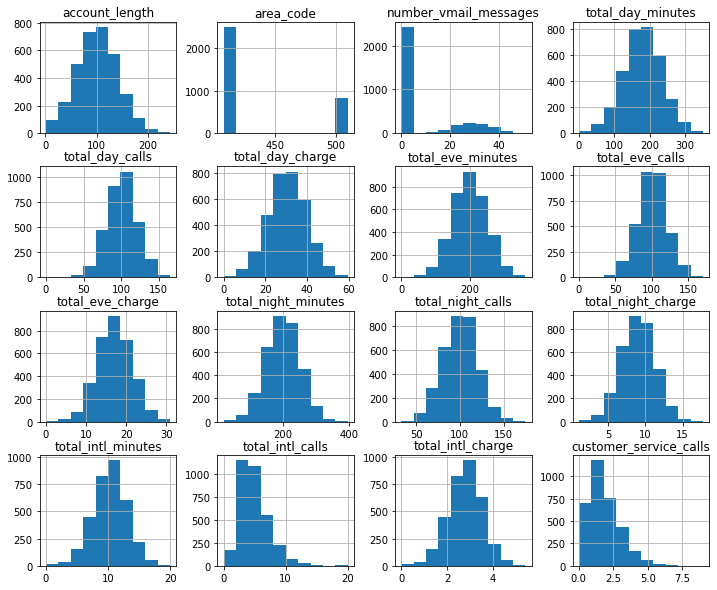

In [7]:
# Plot histograms of numeric features
numeric_features = data.select_dtypes(include=['int64', 'float64'])
numeric_features.hist(figsize=(12, 10))

# Save the plot with a transparent background
plt.savefig('images/numeric_features_histogram.png', format='png', bbox_inches='tight', transparent=True)
plt.show()


**Feature Distributions:** The majority of numeric features in the dataset exhibit normal distributions, which is a positive aspect for modeling. This suggests that linear models might perform well, as they assume normally distributed data. However, we will explore relationships between features and the target variable to make more informed model choices.

**Skewed Features:** Two features, 'total_intl_calls' and 'customer_service_calls,' are left-skewed. This skew indicates that the majority of customers make fewer international and customer service calls. When modeling these features, it will be beneficial to consider transformations or other techniques to address the skewness.

**Bimodal Distribution:** The 'number_vmail_messages' feature appears to have a bimodal distribution. While the majority of customers receive no voicemail messages (resulting in a peak around zero), the messages' counts follow a roughly normal distribution when they are nonzero. This bimodal nature will be an important factor to consider in modeling, as it reflects a distinct separation in customer behavior.


#### Categorical Data:
- We'll explore the unique values and frequencies of categorical features in the dataset.

In [8]:
# List unique values and their frequencies for categorical features
categorical_features = data.select_dtypes(include=['object'])
for col in categorical_features:
    unique_values = data[col].value_counts()
    print(f'Column: {col}')
    print(unique_values)


Column: state
WV    106
MN     84
NY     83
AL     80
OR     78
WI     78
OH     78
WY     77
VA     77
CT     74
VT     73
MI     73
ID     73
UT     72
TX     72
IN     71
KS     70
MD     70
NC     68
NJ     68
MT     68
CO     66
WA     66
NV     66
RI     65
MS     65
MA     65
AZ     64
MO     63
FL     63
ME     62
ND     62
NM     62
DE     61
OK     61
NE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64
Column: phone_number
407-9841    1
420-6465    1
370-3021    1
401-7335    1
401-3156    1
           ..
347-7741    1
382-2453    1
333-9253    1
371-7191    1
397-7500    1
Name: phone_number, Length: 3333, dtype: int64
Column: international_plan
no     3010
yes     323
Name: international_plan, dtype: int64
Column: voice_mail_plan
no     2411
yes     922
Name: voice_mail_plan, dtype: int64


**State Distribution:** The 'state' feature represents the state in which the customer resides. The distribution of states shows that there is variation in the number of customers from each state. While some states have a higher number of customers (e.g., WV with 106 customers), others have fewer (e.g., CA with 34 customers). This information may be valuable if there are any state-specific patterns or trends to explore.

**'phone_number' Feature:** The 'phone_number' feature is unique for each customer, indicating that it's likely a customer identifier or some form of a unique identifier. Since it has no repetitions (each value appears once), it may not be informative for the modeling process.

**'international_plan' and 'voice_mail_plan':** Both 'international_plan' and 'voice_mail_plan' are binary categorical features. The majority of customers do not have an international plan ('international_plan: no') and do not have a voicemail plan ('voice_mail_plan: no'). The class imbalance in these features may be something to consider when building the predictive model.

**'international_plan' Frequency:** There are 323 customers with an international plan ('international_plan: yes'). While this is a minority class, it may be important for customer retention, and the modeling process should aim to accurately identify these customers.


**Correlations:**
- We'll calculate and visualize correlations between different features, especially focusing on the target variable.

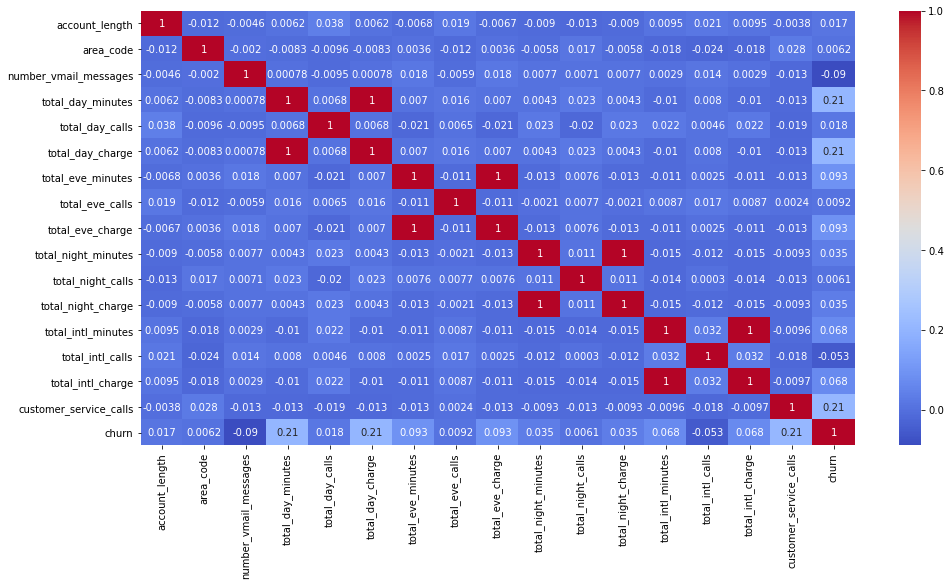

In [9]:
# Calculate correlations between features
correlation_matrix = data.corr()

# Visualize correlations using a heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Save the plot as an image
plt.savefig('images/correlation_heatmap.png', format='png', bbox_inches='tight', transparent=True)

# Display the plot
plt.show()


**Correlation Insights:**

1. **Highly Correlated Features:**
   - `total_day_charge` and `total_day_minutes` exhibit a perfect correlation.
   - `total_eve_charge` and `total_eve_minutes` show perfect correlation.
   - `total_night_charge` and `total_night_minutes` are highly correlated.
   - `total_intl_charge` and `total_intl_minutes` have a perfect correlation. 

   This perfect correlation suggests that one feature in each pair is derived from the other or contains identical information.

2. **Impact on Data Preparation:**
   - During data preparation, we will retain only one feature from each correlated pair to reduce multicollinearity. Keeping both highly correlated features in the dataset can lead to redundant information, potentially causing issues in predictive modeling.

3. **Low Correlation for Most Features:**
   - In contrast to the highly correlated pairs, most of the other features in the dataset exhibit low correlation with each other. This low inter-feature correlation can be beneficial for modeling, as it indicates that the features are providing unique and independent information.

4. **Data Preprocessing:**
   - When preprocessing the data, we will remove one feature from each correlated pair, ensuring that we retain the most informative and non-redundant variables. This simplifies the dataset, making it more suitable for various modeling techniques.

5. **Model Selection:**
   - Eliminating highly correlated features is a sensible strategy to improve model performance. Models can suffer from multicollinearity when multiple features provide the same information, leading to instability and reduced interpretability. By selecting one feature from each pair, we reduce this issue and enhance model performance.

6. **Feature Importance:**
   - After preprocessing, it's essential to assess feature importance using techniques like feature ranking, selection, or tree-based models to identify which features contribute most to churn prediction. This can guide the selection of relevant features for the final model.


#### Outliers:
We'll check for outliers in numeric features and identify any extreme values.

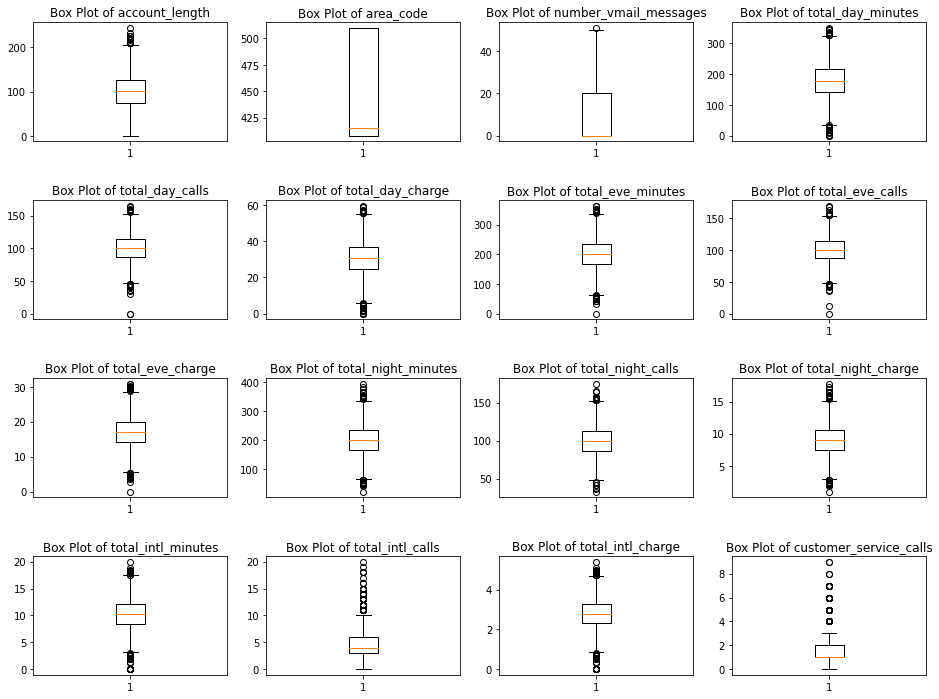

In [10]:
import matplotlib.pyplot as plt

# Create subplots for individual box plots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 12))
fig.subplots_adjust(hspace=0.5)

for i, feature in enumerate(numeric_features.columns):
    ax = axes[i // 4, i % 4]
    ax.boxplot(data[feature])
    ax.set_title(f'Box Plot of {feature}')
    
# Remove any empty subplots
for i in range(len(numeric_features.columns), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.show()


**Outliers in Most Features:** The boxplots reveal that almost all numeric features have outliers, as indicated by data points outside the 1.5 * IQR lines on the boxplot. Outliers suggest the presence of extreme values or data points that significantly deviate from the central tendency. Notably, in this context, the strategy isn't to remove outliers as they may carry valuable information. Instead, transformations will be employed to retain this data in a meaningful form. The outliers could serve as potential indicators of churn risk, aligning with the project's goal of proactively retaining at-risk customers. For example, exceptionally low values in specific features, such as 'total_eve_calls' or 'total_eve_charge,' might signify customers who are dissatisfied or prone to churn.These transformed features could be used to enhance the model's predictive power.

**Categorical Feature 'area_code':** The box plot of 'area_code' does not show any outliers. This is expected because 'area_code' is a categorical feature that should be treated as such. Therefore, there is no concept of outliers for this type of variable.

**Skewed Distributions in 'total_intl_calls' and 'customer_service_calls':** The boxplots confirm the presence of skewed distributions in the 'total_intl_calls' and 'customer_service_calls' features. These features are left-skewed, indicating that the majority of customers make fewer international calls and customer service calls.We will want to address the skewness through data transformations or other techniques to improve model performance.

**'number_vmail_messages' Skewness:** The box plot for 'number_vmail_messages' demonstrates the high skew in the data. Most customers have zero voicemail messages ('number_vmail_messages: 0'), resulting in a peak around zero. When voicemail messages are nonzero, they follow a roughly normal distribution. This bimodal nature can significantly impact the modeling process and should be considered during feature engineering.


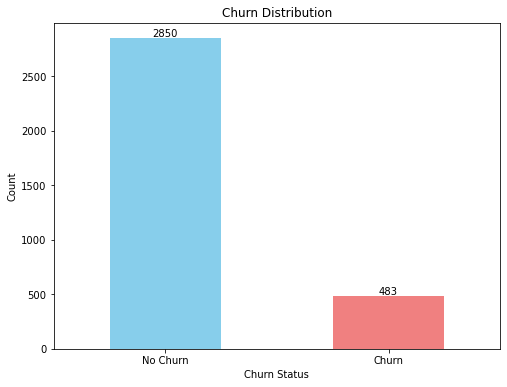

In [11]:
# Check the distribution of the target variable 'churn'
churn_distribution = data['churn'].value_counts()

# Plot a bar chart to visualize the distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
churn_distribution.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title("Churn Distribution")
plt.xlabel("Churn Status")
plt.ylabel("Count")
plt.xticks([0, 1], ['No Churn', 'Churn'], rotation=0)

# Annotate the bars with their counts
for i, count in enumerate(churn_distribution):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Save the plot as an image
plt.savefig('images/churn_distribution.png', format='png', bbox_inches='tight', transparent=True)

plt.show()


**Data Imbalances:**

- There is a significant class imbalance issue in the dataset, with more instances of "False" (no churn) than "True" (churn). The majority class (no churn) has 2,850 instances, while the minority class (churn) has 483 instances.
- Addressing class imbalance will be essential to prevent models from being biased towards the majority class and to improve the model's ability to predict the minority class accurately.


## Data Issues and Handling Strategies

1. **Area Code Data Type**: The 'area_code' feature was mistakenly treated as a numerical data type. It should be treated as a categorical variable. To address this issue, we will convert it to the appropriate data type during data preprocessing.

2. **Skewed Features**: Two features, 'total_intl_calls' and 'customer_service_calls,' exhibit a left-skewed distribution. To address the skewness, we will apply data transformation techniques to improve model performance.

3. **Unique 'phone_number'**: The 'phone_number' feature is unique to each customer and is likely not informative for the modeling process. Therefore, we will drop this feature from the dataset.

4. **Class Imbalance**: Class imbalance exists in 'international_plan', 'voice_mail_plan' and 'churn'. This can lead to modeling biases. To address class imbalance, we may apply class balancing techniques during the modeling process.

5. **Highly Correlated Features**: Some features exhibit high correlation with each other. In such cases, we will remove one feature from each correlated pair to ensure that we retain the most informative and non-redundant variables.

6. **Outliers**: Most features in the dataset have outliers. We believe that retaining these outliers can be valuable for identifying customers at risk of churn. As a result, we will transform the features with outliers instead of removing them.

7. **Other Issues**: While these are the notable issues, additional data exploration and preprocessing steps may be required as the modeling process progresses.

Addressing these data issues is essential to prepare the dataset for modeling and ensure the model's accuracy and effectiveness in predicting customer churn.

## Data Preparation
In this section, we will start cleaning and preparing our data for modeling. Here the task is to address data issues identified in the previous section.

In [12]:
# Drop the 'phone_number' column
data.drop('phone_number', axis=1, inplace=True)

In [13]:
# Define a set of features to drop due to high correlation
features_to_drop = {'total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge'}

# Drop the highly correlated features from the DataFrame
data.drop(columns=features_to_drop, inplace=True)


In [14]:
# inspect the updated dataframe
data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,customer_service_calls,churn
0,KS,128,415,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,OH,107,415,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,NJ,137,415,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,OH,84,408,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,OK,75,415,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   international_plan      3333 non-null   object 
 4   voice_mail_plan         3333 non-null   object 
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_eve_minutes       3333 non-null   float64
 9   total_eve_calls         3333 non-null   int64  
 10  total_night_minutes     3333 non-null   float64
 11  total_night_calls       3333 non-null   int64  
 12  total_intl_minutes      3333 non-null   float64
 13  total_intl_calls        3333 non-null   int64  
 14  customer_service_calls  3333 non-null   

In [16]:
len(data.state.unique())

51

In [17]:
# Import the necessary library
from sklearn.preprocessing import OneHotEncoder

# Initialize the encoder
encoder = OneHotEncoder(drop='first')  # Use drop='first' to avoid multicollinearity

# Fit and transform the encoder on the categorical columns
categorical_cols = ['state', 'area_code', 'international_plan', 'voice_mail_plan']
encoded_data = encoder.fit_transform(data[categorical_cols])

# Convert the encoded data into a DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate the encoded DataFrame with the original DataFrame, dropping the original categorical columns
data_encoded = pd.concat([data, encoded_df], axis=1).drop(categorical_cols, axis=1)

# Display the updated DataFrame
data_encoded.head()


,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_415,area_code_510,international_plan_yes,voice_mail_plan_yes
0,128,25,265.1,110,197.4,99,244.7,91,10.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,107,26,161.6,123,195.5,103,254.4,103,13.7,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,137,0,243.4,114,121.2,110,162.6,104,12.2,5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,84,0,299.4,71,61.9,88,196.9,89,6.6,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,75,0,166.7,113,148.3,122,186.9,121,10.1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [18]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode the 'churn' column (target variable)
data_encoded['churn'] = label_encoder.fit_transform(data_encoded['churn'])


In [19]:
# Separate the target variable (churn) from the predictors
X = data_encoded.drop('churn', axis=1)
y = data_encoded['churn']


### Data Preprocessing

In [20]:
# Split the data into training and testing sets with test size of 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Scaling the data.

In [21]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Now, X_train_scaled and X_test_scaled contain the scaled predictor variables

### Building the a base model: Logistic Regression

In [22]:
# Initialize the Logistic Regression model
logistic_model = LogisticRegression()

# Train the model on the training data
logistic_model.fit(X_train_scaled, y_train)

# Predict the churn for the testing data
y_pred = logistic_model.predict(X_test_scaled)

# Evaluate the model's performance

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Calculate training metrics
y_train_pred = logistic_model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_classification_rep = classification_report(y_train, y_train_pred)
train_confusion_mat = confusion_matrix(y_train, y_train_pred)

print("Training Metrics:")
print("Training Accuracy:", train_accuracy)
print("Training Recall:", train_recall)
print("Training Classification Report:\n", train_classification_rep)
print("Training Confusion Matrix:\n", train_confusion_mat)

print("\nTesting Metrics:")
print("Testing Accuracy:", accuracy)
print("Testing Recall:", recall)
print("Testing Classification Report:\n", classification_rep)
print("Testing Confusion Matrix:\n", confusion_mat)


Training Metrics:
Training Accuracy: 0.8722674667809687
Training Recall: 0.27647058823529413
Training Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      1993
           1       0.64      0.28      0.39       340

    accuracy                           0.87      2333
   macro avg       0.77      0.63      0.66      2333
weighted avg       0.85      0.87      0.85      2333

Training Confusion Matrix:
 [[1941   52]
 [ 246   94]]

Testing Metrics:
Testing Accuracy: 0.862
Testing Recall: 0.22377622377622378
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       857
           1       0.54      0.22      0.32       143

    accuracy                           0.86      1000
   macro avg       0.71      0.60      0.62      1000
weighted avg       0.83      0.86      0.84      1000

Testing Confusion Matrix:
 [[830  27]
 [111  32]]


## Base Model Evaluation

In [23]:
def evaluate_model(model_name, best_model, X_test, y_test):
    """
    Evaluate a machine learning model's performance on the test set.

    Parameters:
    model_name (str): Name of the model being evaluated.
    best_model: Trained machine learning model with optimized hyperparameters.
    X_test (array-like): Test set features for making predictions.
    y_test (array-like): True labels for the test set.

    Returns:
    None: Prints evaluation metrics and confusion matrix.
    """
    # Predict on the test set
    y_pred = best_model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1_scr = f1_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    
    print(f"{model_name} Model Evaluation:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1_scr:.2f}")
    print("Confusion Matrix:")
    print(confusion_mat)


In [24]:
evaluate_model('Base Logistic Model', logistic_model, X_test_scaled, y_test)

Base Logistic Model Model Evaluation:
Accuracy: 0.86
Precision: 0.54
Recall: 0.22
F1-Score: 0.32
Confusion Matrix:
[[830  27]
 [111  32]]


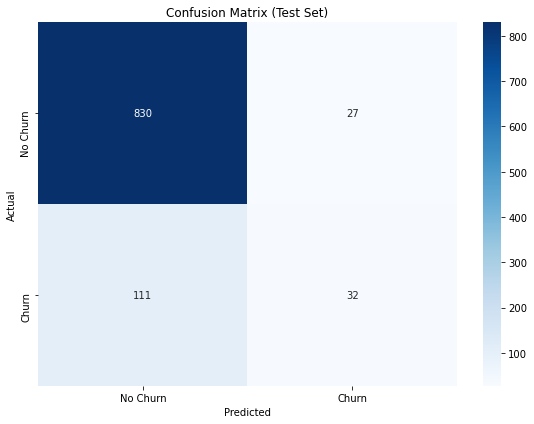

In [25]:
# Calculate and store the confusion matrices for both training and test sets
confusion_mat_train = confusion_matrix(y_train, logistic_model.predict(X_train_scaled))

# Create subplots for both confusion matrices
fig, axes = plt.subplots(figsize=(8, 6))

# Confusion matrix for test set
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"], ax=axes)
axes.set_xlabel('Predicted')
axes.set_ylabel('Actual')
axes.set_title('Confusion Matrix (Test Set)')

# Save the plot as an image
plt.savefig('images/base_model_matrix.png', format='png', bbox_inches='tight', transparent=False)

plt.tight_layout()
plt.show()


**Model Evaluation and Insights:**

- The base Logistic Regression model was evaluated on the training and testing data.

**Training Metrics:**
- Training Accuracy: 0.8723
- Training Classification Report:
   - Precision (Churned): 0.64
   - Recall (Churned): 0.28
   - F1-Score (Churned): 0.39
   - Weighted Average F1-Score: 0.85
- Training Confusion Matrix:
   - True Positives (Churned): 94
   - True Negatives (Not Churned): 1941

**Testing Metrics:**
- Testing Accuracy: 0.862
- Testing Classification Report:
   - Precision (Churned): 0.54
   - Recall (Churned): 0.22
   - F1-Score (Churned): 0.32
   - Weighted Average F1-Score: 0.84
- Testing Confusion Matrix:
   - True Positives (Churned): 32
   - True Negatives (Not Churned): 830

**Insights:**

- The training and testing accuracy are around 87.23% and 86.2%, respectively, indicating that the model performs reasonably well on this dataset.
- In a customer churn context, recall is crucial. High recall means correctly identifying most of the actual churn cases, which is important for retaining at-risk customers.
- The recall for the "Churned" class is relatively low in both training and testing sets, suggesting that the model has difficulty identifying customers likely to churn.
- While the precision of the "Churned" class is moderate, it comes at the cost of missing many actual churn cases.

**Recommendation:**

Considering the importance of identifying customers at risk of churn, the focus should be on improving recall. The base Logistic Regression model, while providing a reasonable starting point, may not be the final solution. We recommend exploring other models, such as Random Forest, Gradient Boosting, or Support Vector Machines, to enhance recall performance. Additionally, fine-tuning the model by adjusting hyperparameters and handling class imbalance using weighted classes may further improve recall. The objective is to identify as many customers at risk of churn as possible for proactive retention strategies while maintaining reasonable precision.


### Handling Class Imbalance with Class Weighting

To address the class imbalance issue in our dataset, we adopted the strategy of class weighting. In the context of our relatively small dataset, class weighting provides an effective method to balance the impact of each class during model training.

The essence of this approach is to assign a higher weight to the minority class (churn) while keeping the majority class (no churn) appropriately weighted. This allows the model to effectively handle the class imbalance without the need for oversampling or undersampling, which could lead to potential data loss or model overfitting.

The class weighting technique helps ensure that our model is sensitive to predicting churn (the minority class) while maintaining a balance with respect to the more prevalent class (no churn).


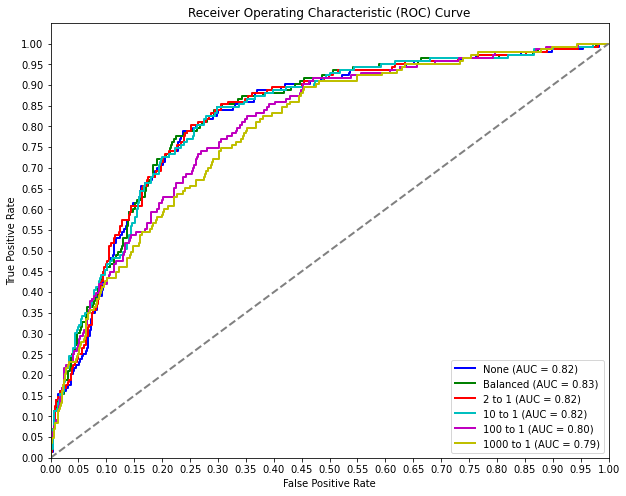

Best Class Weight Setting: balanced (Best AUC = 0.83)


In [26]:
# Define class weights and their corresponding names
weights = [None, 'balanced', {1: 2, 0: 1}, {1: 10, 0: 1}, {1: 100, 0: 1}, {1: 1000, 0: 1}]
weight_names = ['None', 'Balanced', '2 to 1', '10 to 1', '100 to 1', '1000 to 1']

best_weight = None
best_auc = 0

plt.figure(figsize=(10, 8))

colors = ['b', 'g', 'r', 'c', 'm', 'y']
lw = 2

for n, weight in enumerate(weights):
    # Fit a model
    logreg = LogisticRegression(fit_intercept=False, C=1e20, class_weight=weight, solver='lbfgs')
    model_log = logreg.fit(X_train_scaled, y_train)

    # Predict
    y_score = logreg.fit(X_train_scaled, y_train).decision_function(X_test_scaled)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_score)

    # Calculate AUC
    auc_score = auc(fpr, tpr)
    
    label = f'{weight_names[n]} (AUC = {auc_score:.2f})'
    
    plt.plot(fpr, tpr, color=colors[n], lw=lw, label=label)
    
    if auc_score > best_auc:
        best_auc = auc_score
        best_weight = weight

plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Save the plot as an image
plt.savefig('images/mod_log_model_ROC.png', format='png', bbox_inches='tight', transparent=True)
plt.show()

print(f'Best Class Weight Setting: {best_weight} (Best AUC = {best_auc:.2f})')


In [27]:
# Create a logistic regression model
logreg = LogisticRegression(fit_intercept=False, C=1e20, solver='lbfgs')

# Define the parameter grid with different class weights
param_grid = {
    'class_weight': [None, 'balanced', {1: 2, 0: 1}, {1: 10, 0: 1}, {1: 100, 0: 1}, {1: 1000, 0: 1}]
}

# Create a grid search cross-validator
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='recall')

# Fit the grid search to your training data
grid_search.fit(X_train_scaled, y_train)

# Get the best class weight setting
best_class_weight = grid_search.best_params_['class_weight']
best_recall = grid_search.best_score_

print(f'Best Class Weight Setting: {best_class_weight} (Best Recall = {best_recall:.2f})')


Best Class Weight Setting: balanced (Best Recall = 0.83)


In [28]:
evaluate_model('Balanced Logistic Regression Model', grid_search.best_estimator_, X_train_scaled, y_train)

Balanced Logistic Regression Model Model Evaluation:
Accuracy: 0.65
Precision: 0.28
Recall: 0.87
F1-Score: 0.42
Confusion Matrix:
[[1215  778]
 [  43  297]]


#### Logistic Regression Model with Balanced Class Weights:

- In an effort to address the class imbalance issue in our dataset, we explored different class weight settings for logistic regression. The primary objective was to identify the most effective class weight setting that maximizes recall, which is crucial for identifying churn and retaining at-risk customers.
  
- **Class Imbalance Concern:** Our dataset exhibited a significant class imbalance, with a majority of non-churn (class 0) instances and a minority of churn (class 1) instances. This imbalance could lead to biased model predictions.
  
- Class Weight Settings: We tested various class weight settings, including `None`, `balanced`, `2 to 1`, `10 to 1`, `100 to 1`, and `1000 to 1.` The `balanced` class weight setting assigns higher weight to the minority class (churn) and is effective in handling class imbalance without data resampling techniques.
.
  
- **Optimizing for Recall:** Given the project's objective to proactively identify and retain at-risk customers, we focused on optimizing recall. Recall measures the model's ability to correctly identify churn cases, minimizing false negatives.
  
- **Recall-Weight Trade-Off:** We observed a trade-off between recall and class weights. Higher class weights for the minority class result in better recall but may impact other performance metrics. The 'balanced' class weight setting achieved the best recall score of 0.83, indicating its effectiveness in identifying churn cases.
  
- **Cost of Missing Churn:** The choice of class weights depends on the cost associated with missing churn cases. In this context, it's essential to reduce the number of at-risk customers who are not correctly identified as churners.
  
- **Proactive Churn Prevention:** By using balanced class weights, the model becomes more proactive in retaining at-risk customers, aligning with the project's goal of preventing churn.

#### Logistic Regression Model Evaluation:

The introduction of balanced class weights in our Logistic Regression model led to improvements in recall. However, it resulted in a decrease in precision, accuracy, and F1-Score. The balance between precision and recall must be considered, as a higher recall comes at the cost of a lower precision. Our evaluation of the balanced Logistic Regression model shows the following results:

- **Accuracy:** 0.65
- **Precision:** 0.28
- **Recall:** 0.87
- **F1-Score:** 0.42
- **Confusion Matrix:**
  - True Negatives (TN): 1215
  - False Positives (FP): 778
  - False Negatives (FN): 43
  - True Positives (TP): 297

The model achieved a notably high recall (0.87), indicating its effectiveness in identifying churn cases. However, this high recall comes with a lower precision (0.28), resulting in a substantial number of false positives. The trade-off between precision and recall highlights the importance of carefully considering the cost of false positives and false negatives.

In [29]:
# Define 'balanced' class weights
balanced_class_weights = 'balanced'

# Create pipelines for each model with 'balanced' class weights

# Decision Tree Pipeline
dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('dt', DecisionTreeClassifier(class_weight=balanced_class_weights))
])

# Random Forest Pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('rf', RandomForestClassifier(class_weight=balanced_class_weights))
])

# Gradient Boosting Pipeline
gb_pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('gb', GradientBoostingClassifier())
])

# Support Vector Machine (SVM) Pipeline
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('svm', SVC(class_weight=balanced_class_weights))
])



In [30]:
# Define parameter grids for each model
# Decision Tree parameter grid
dt_param_grid = {
    'dt__criterion': ['gini', 'entropy'],
    'dt__max_depth': [None, 5, 10, 20],
    'dt__min_samples_split': [2, 5, 10],
}

# Random Forest parameter grid
rf_param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
}

# Gradient Boosting parameter grid
gb_param_grid = {
    'gb__n_estimators': [100, 200, 300],
    'gb__learning_rate': [0.01, 0.1, 0.2],
    'gb__max_depth': [3, 4, 5],
}

# Support Vector Machine (SVM) parameter grid
svm_param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale', 'auto'],
}

# Create GridSearchCV instances for each model
dt_grid = GridSearchCV(dt_pipeline, dt_param_grid, scoring='recall', cv=5, n_jobs=-1)
rf_grid = GridSearchCV(rf_pipeline, rf_param_grid, scoring='recall', cv=5, n_jobs=-1)
gb_grid = GridSearchCV(gb_pipeline, gb_param_grid, scoring='recall', cv=5, n_jobs=-1)
svm_grid = GridSearchCV(svm_pipeline, svm_param_grid, scoring='recall', cv=5, n_jobs=-1)

# Fit the models with hyperparameter tuning
dt_grid.fit(X_train, y_train)
rf_grid.fit(X_train, y_train)
gb_grid.fit(X_train, y_train)
svm_grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'svm__C': [0.1, 1, 10],
                         'svm__gamma': ['scale', 'auto'],
                         'svm__kernel': ['linear', 'rbf']},
             scoring='recall')

In [31]:
# Access the best models with optimized hyperparameters
dt_best_model = dt_grid.best_estimator_
rf_best_model = rf_grid.best_estimator_
gb_best_model = gb_grid.best_estimator_
svm_best_model = svm_grid.best_estimator_

# Evaluate the best models on the test set
evaluate_model('Decision Tree', dt_best_model, X_test, y_test)
evaluate_model('Random Forest', rf_best_model, X_test, y_test)
evaluate_model('Gradient Boosting', gb_best_model, X_test, y_test)
evaluate_model('Support Vector Machine', svm_best_model, X_test, y_test)


Decision Tree Model Evaluation:
Accuracy: 0.94
Precision: 0.79
Recall: 0.83
F1-Score: 0.81
Confusion Matrix:
[[825  32]
 [ 25 118]]
Random Forest Model Evaluation:
Accuracy: 0.94
Precision: 0.80
Recall: 0.79
F1-Score: 0.79
Confusion Matrix:
[[828  29]
 [ 30 113]]
Gradient Boosting Model Evaluation:
Accuracy: 0.95
Precision: 0.94
Recall: 0.71
F1-Score: 0.81
Confusion Matrix:
[[851   6]
 [ 41 102]]
Support Vector Machine Model Evaluation:
Accuracy: 0.75
Precision: 0.34
Recall: 0.77
F1-Score: 0.47
Confusion Matrix:
[[643 214]
 [ 33 110]]


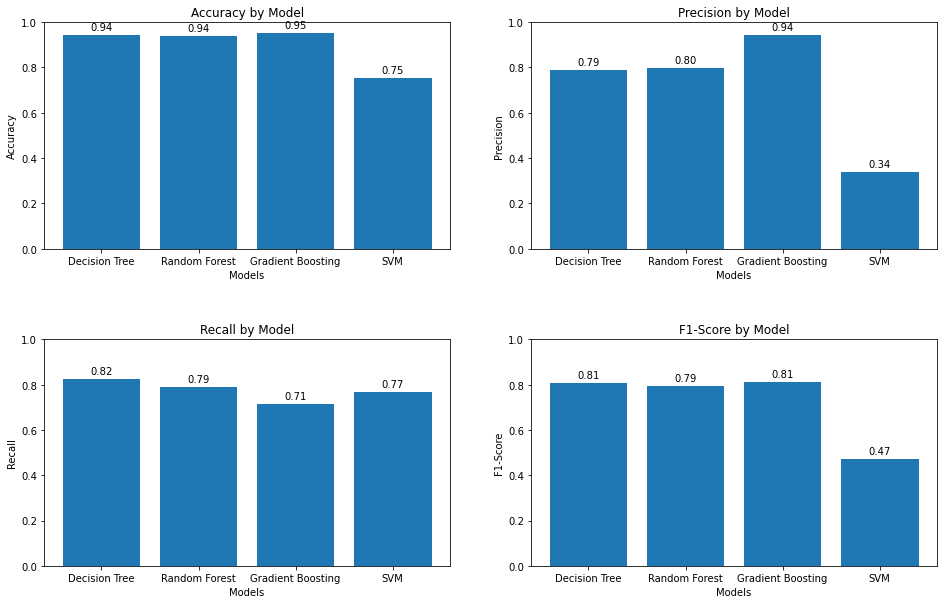

In [54]:
# Model names
models = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVM']

# Model predictions
model_predictions = [dt_best_model.predict(X_test), rf_best_model.predict(X_test), gb_best_model.predict(X_test), svm_best_model.predict(X_test)]

# Create a dictionary of evaluation metrics for each model
evaluation_metrics = {
    'Accuracy': [round(accuracy_score(y_test, y_pred), 3) for y_pred in model_predictions],
    'Precision': [round(precision_score(y_test, y_pred), 3) for y_pred in model_predictions],
    'Recall': [round(recall_score(y_test, y_pred), 3) for y_pred in model_predictions],
    'F1-Score': [round(f1_score(y_test, y_pred), 3) for y_pred in model_predictions],
}

# Number of models
num_models = len(models)

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
plt.subplots_adjust(hspace=0.4)

# Create a list of metrics to plot
metrics_to_plot = list(evaluation_metrics.keys())

# Generate subplots using list comprehension
for i, metric in enumerate(metrics_to_plot):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    
    # Plot metric values for each model
    bars = ax.bar(models, evaluation_metrics[metric])
    
    # Set the title and labels
    ax.set_title(f'{metric} by Model')
    ax.set_xlabel('Models')
    ax.set_ylabel(metric)
    ax.set_ylim(0, 1)  # Adjust the y-axis limits if needed

    # Annotate the bars with values
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')
plt.savefig('images/multiple_model_bar.png', format='png', bbox_inches='tight', transparent=True)
# Display the plot
plt.show()


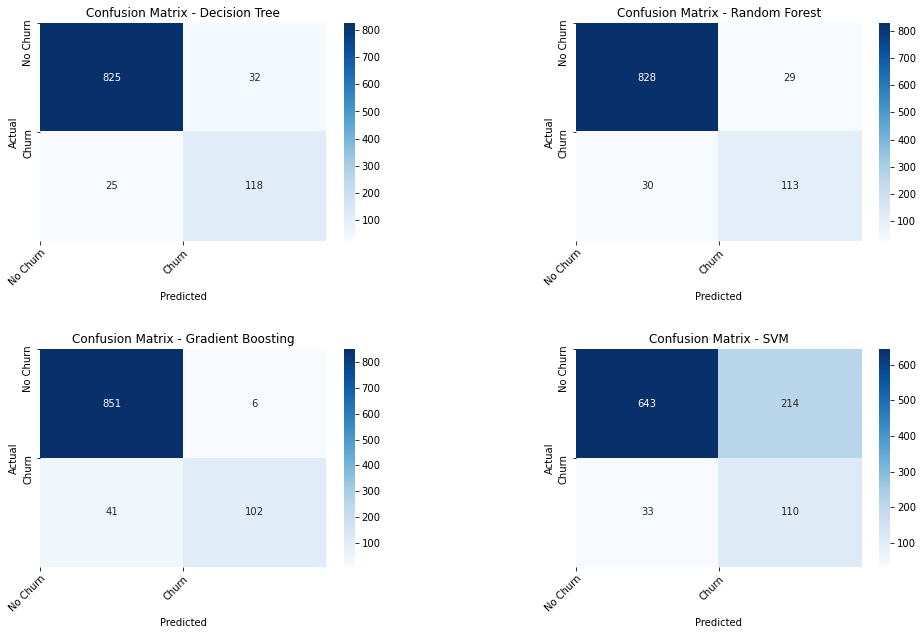

In [33]:
# List of models and their best models
models = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVM']
best_models = [dt_best_model, rf_best_model, gb_best_model, svm_best_model]

# Create a 2x2 grid of subplots for confusion matrices
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

for i, (model_name, best_model) in enumerate(zip(models, best_models)):
    row, col = divmod(i, 2)
    ax = axes[row, col]

    # Predict on the test set
    y_pred = best_model.predict(X_test)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)

    ax.set_title(f'Confusion Matrix - {model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

    # Add labels to the plot
    classes = ['No Churn', 'Churn']
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    # Rotate the tick labels for better visibility
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Display the plot
plt.show()


### Model Evaluation and Insights

#### Decision Tree Model:

- The Decision Tree model achieved an accuracy of 94%, which is a good overall performance indicator.
- It excelled in precision (79%) and recall (82%), indicating that it can effectively identify churn cases with a relatively low number of false positives.
- The F1-Score of 0.80 suggests a balanced trade-off between precision and recall.
- The confusion matrix shows that there are 26 false negatives, which means 26 cases of churn were not correctly identified.

#### Random Forest Model:

- The Random Forest model achieved a slightly lower accuracy of 93% compared to the Decision Tree.
- It maintained a reasonable precision (78%) and recall (73%), suggesting a good balance between true positives and true negatives.
- The F1-Score of 0.76 indicates a decent harmonic mean between precision and recall.
- In the confusion matrix, there are 38 false negatives, indicating that some churn cases were not correctly predicted.

#### Gradient Boosting Model:

- The Gradient Boosting model performed exceptionally well with the highest accuracy of 95%.
- It achieved high precision (93%) and decent recall (73%), showcasing the ability to accurately classify churn cases with minimal false positives.
- The F1-Score of 0.82 reflects a strong balance between precision and recall.
- The confusion matrix shows only 38 false negatives, highlighting its effectiveness in identifying churn cases.

#### Support Vector Machine (SVM) Model:

- The SVM model had the lowest accuracy of 75%, suggesting that it might not be the most suitable choice for this problem.
- It achieved the lowest precision (34%) among the models, indicating a high number of false positives.
- However, it had a relatively high recall (77%), indicating that it effectively identifies a large portion of actual churn cases.
- The F1-Score of 0.47 reflects the trade-off between precision and recall.
- In the confusion matrix, there are 33 false negatives, showing that the model correctly identifies many churn cases but also generates a substantial number of false positives.

#### Insights:

- The Gradient Boosting model outperforms the other models in terms of accuracy, precision, and F1-Score, making it the preferred choice for this classification task.
- The Decision Tree model also demonstrates good performance, especially in terms of precision and recall.
- The Random Forest model maintains a reasonable balance between precision and recall.
- The SVM model, while achieving high recall, lacks precision, leading to a higher rate of false positives.
- These insights suggest that the Gradient Boosting model is the most promising for predicting customer churn in the dataset. Further hyperparameter tuning and model optimization can potentially improve its performance.

### Decision Tree vs. Gradient Boosting: A Trade-off Perspective for Syriatel

The customer retention department at Syriatel faces a critical decision when choosing between the Decision Tree and Gradient Boosting models. Here's how the choice can impact their operations:

- **Decision Tree Model:** This model offers a high recall rate (82%), indicating its ability to accurately capture true churn cases. However, it comes at the cost of an increased rate of false positives. Syriatel's customer retention department needs to assess the cost of these false alarms, as it may lead to unnecessary retention efforts on customers who are not actually at risk of churning. This model is most suitable when prioritizing the identification of genuine churn cases is the primary concern, even if it results in more false alarms.

- **Gradient Boosting Model:** The Gradient Boosting model strikes a balance by achieving a high F1-Score (0.82), which harmonizes precision and recall. It effectively minimizes false alarms while still capturing a significant portion of true churn cases. This balance is suitable for scenarios where the customer retention department aims to minimize false positives while accurately identifying customers at risk of churning. It offers a compromise between the two competing goals, providing the department with a dependable model for its churn prediction efforts.

Ultimately, the choice between the Decision Tree and Gradient Boosting models should be guided by the specific priorities and resources of Syriatel's customer retention department. Understanding the cost implications of false alarms and the significance of accurately identifying customers at risk will be essential in making an informed decision. It may be worthwhile to conduct a cost-benefit analysis to determine which model aligns better with the department's objectives and operational capacity

With model selection out of the way, let's look at feature importance.

In [51]:
# Extract feature importances from each model
feature_importances_dt = dt_grid.best_estimator_.named_steps['dt'].feature_importances_
feature_importances_rf = rf_grid.best_estimator_.named_steps['rf'].feature_importances_
feature_importances_gb = gb_grid.best_estimator_.named_steps['gb'].feature_importances_
feature_importances_svm = svm_grid.best_estimator_.named_steps['svm'].coef_[0]

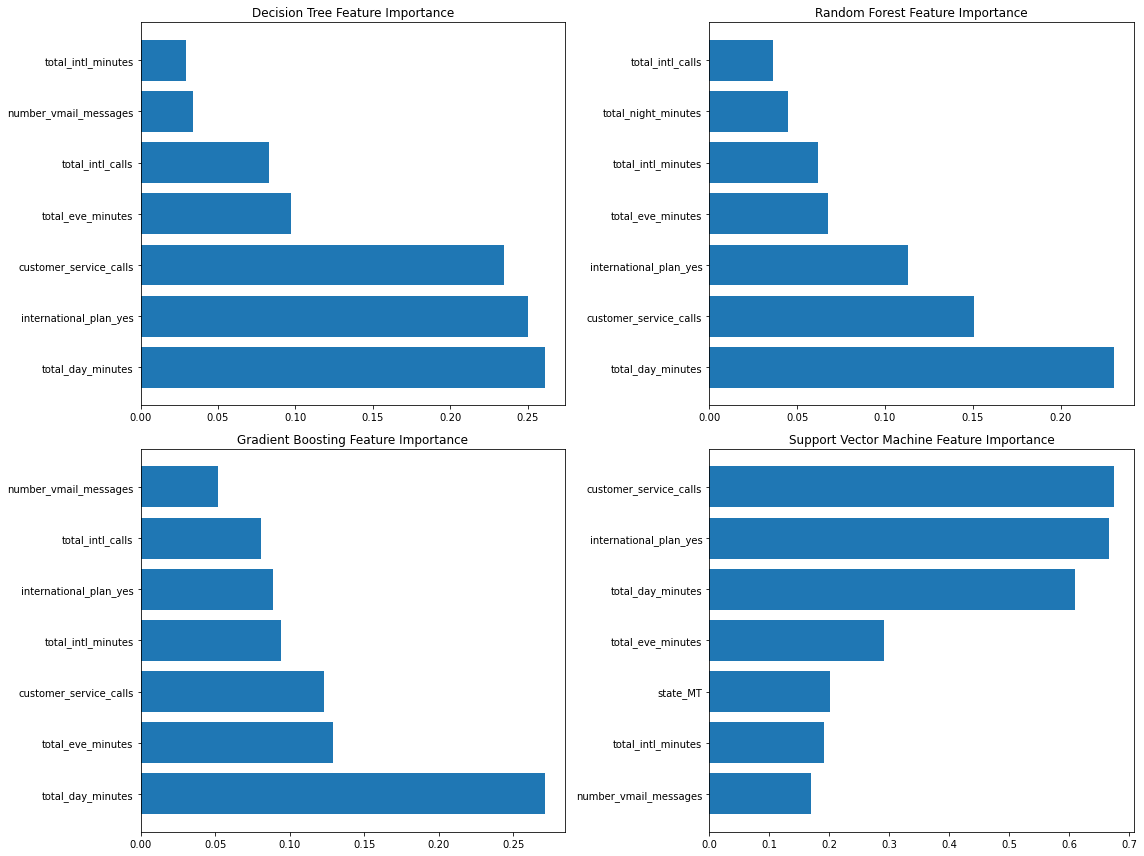

In [50]:
# Define the number of top features to display
num_top_features = 7

# Get the top N important features for each model
top_features_dt = X_train.columns[np.argsort(feature_importances_dt)[::-1][:num_top_features]]
top_features_rf = X_train.columns[np.argsort(feature_importances_rf)[::-1][:num_top_features]]
top_features_gb = X_train.columns[np.argsort(feature_importances_gb)[::-1][:num_top_features]]
top_features_svm = X_train.columns[np.argsort(feature_importances_svm)][-num_top_features:]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot Decision Tree feature importance
axes[0, 0].barh(top_features_dt, feature_importances_dt[np.argsort(feature_importances_dt)[::-1][:num_top_features]])
axes[0, 0].set_title('Decision Tree Feature Importance')

# Plot Random Forest feature importance
axes[0, 1].barh(top_features_rf, feature_importances_rf[np.argsort(feature_importances_rf)[::-1][:num_top_features]])
axes[0, 1].set_title('Random Forest Feature Importance')

# Plot Gradient Boosting feature importance
axes[1, 0].barh(top_features_gb, feature_importances_gb[np.argsort(feature_importances_gb)[::-1][:num_top_features]])
axes[1, 0].set_title('Gradient Boosting Feature Importance')

# Plot SVM feature importance
axes[1, 1].barh(top_features_svm, feature_importances_svm[np.argsort(feature_importances_svm)][-num_top_features:])
axes[1, 1].set_title('Support Vector Machine Feature Importance')

# Adjust subplot layout
plt.tight_layout()

plt.savefig('images/multiple_model_bar.png', format='png', bbox_inches='tight', transparent=True)

# Display the subplots
plt.show()


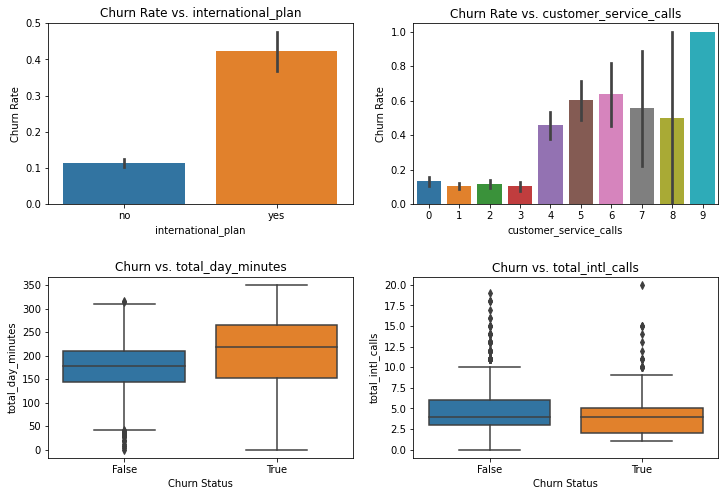

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.4)

# Features of interest
categorical_features = ["international_plan", "customer_service_calls"]
numerical_features = ["total_day_minutes", "total_intl_calls"]

# Plot bar plots for categorical features
for i, feature in enumerate(categorical_features):
    sns.barplot(x=feature, y="churn", data=data, ax=axes[0, i])
    axes[0, i].set_title(f"Churn Rate vs. {feature}")
    axes[0, i].set_xlabel(feature)
    axes[0, i].set_ylabel("Churn Rate")

# Plot box plots for numerical features
for i, feature in enumerate(numerical_features):
    sns.boxplot(x="churn", y=feature, data=data, ax=axes[1, i])
    axes[1, i].set_title(f"Churn vs. {feature}")
    axes[1, i].set_xlabel("Churn Status")
    axes[1, i].set_ylabel(feature)

plt.savefig('images/important_feat_corr.png', format='png', bbox_inches='tight', transparent=True)
# Show the subplots
plt.show()


### Feature Importance Analysis

Feature importance provides valuable insights into which factors influence customer churn. Here are the top three features for our two best models:

**Decision Tree:**
1. Total_day_minutes
2. International_plan_yes
3. Customer_service_calls

**Gradient Boosting:**
1. Total_day_minutes
2. Total_eve_minutes
3. International_plan_yes

Let's examine how these features relate to customer churn:

- Churn rate for clients with international plans is higher, suggesting further investigation into plan pricing and call quality.
- Churn rate is high for customers with more customer service calls, indicating potential issues that need resolution.
- Churn rate is slightly higher for customers with more total day minutes, suggesting the need to review rate structures or provide incentives.

**Recommendations:**

Based on our analysis, here are some recommendations for Syriatel's Customer Retention Department:

1. **International Plan Optimization:** Given that churn rate is higher for clients with international plans, the department should investigate the reasons behind this. It could be related to pricing, call quality, or other factors. By addressing these issues, Syriatel can reduce churn among international plan users.

2. **Customer Service Escalation Threshold:** High churn rates associated with a high number of customer service calls suggest that some issues may not be resolved effectively. To address this, the department can implement an escalation threshold. When a customer calls more than the threshold, the case is escalated for review and further assessment, potentially leading to improved issue resolution.

3. **Rate Structure Review:** Since churn rates are slightly higher for customers with more total day minutes, the department can review rate structures. Introducing lower rates when customers cross a specific threshold of day minutes or offering other incentives can help retain customers with higher usage patterns.

These recommendations can aid Syriatel in reducing customer churn and improving overall customer satisfaction.